In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
table_2 = pd.read_csv('2_column.csv')
table_3 = pd.read_csv('3_column.csv')

In [10]:
class Klobczak:
    def __init__(self, cube_size = 10000, tables = [], curent_element_count = []):
        self.cube_size = cube_size
        self.tables = tables
        self.curent_element_count = curent_element_count


    def split(self, table):
        split_axis = self.find_split_axis(table)
        element_count = table.A.count()

        if element_count<self.cube_size*(2.3):
            #######################
            self.tables.append(table)
            self.curent_element_count.append(element_count)
            #######################

        if(element_count> self.cube_size*2):
            median = np.median(table[split_axis])
            split_table1 = table[table[split_axis] > median]
            split_table2 = table[table[split_axis] < median]
            self.split(split_table1)
            self.split(split_table2)
        else:
            pass


    def find_split_axis(self, table):
        greatest_variance = 0
        for col in table.columns:
            variance = table[col].var()
            if(variance > greatest_variance): 
                greatest_variance = variance
                split_axis = col
        return split_axis

In [17]:
k = Klobczak(10000)
k.split(table_2)

11675


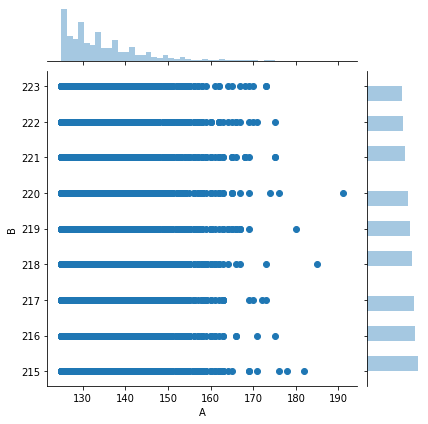

In [20]:
print(k.curent_element_count[1])
sns.jointplot(x='A', y='B', data=k.tables[1])